## 5.20

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./hw8/T5-12.dat", header=None, sep="\s+")

### a

eigenvalues:[ 34.62637013 294.6089834 ]
eigenvectors:
[[-0.8178905  -0.57537391]
 [ 0.57537391 -0.8178905 ]]
f_value:3.2144803278830416


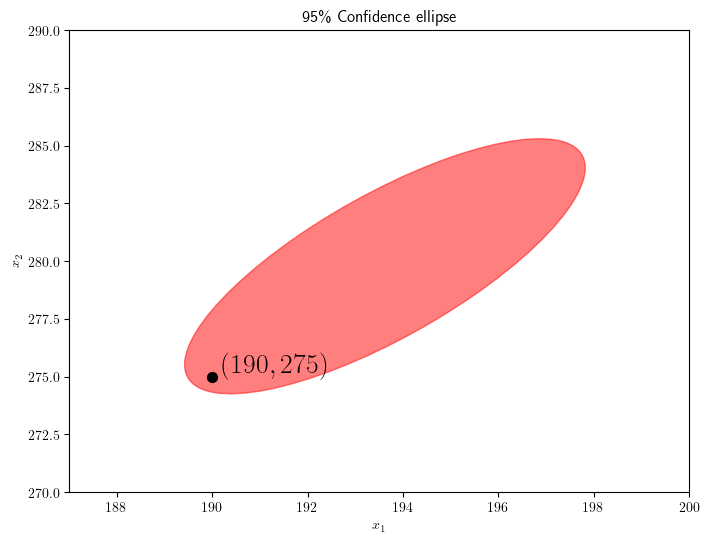

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import f, chi2
from copy import copy

plt.rcParams["text.usetex"] = True

def get_eig(df):
    eig = np.linalg.eig(df.cov())
    return eig
eig = get_eig(df)
print(f"eigenvalues:{eig[0]}")
print(f"eigenvectors:\n{eig[1]}")
p = 2
n = df.shape[0]
def get_f(p, n, a):
    f_v = f.ppf(a, p, n-p)
    return f_v
f_value = get_f(p, n, 0.95)
print(f"f_value:{f_value}")
def get_height_width(p, n, f_value, eig):
    return 2 * np.sqrt( p * (n - 1) / (n * (n - p)) * f_value * eig[0])
height, width = get_height_width(p, n, f_value, eig)
def get_degree(eig):
    return float(np.degrees(np.arctan(eig[1][0, 0]/ eig[1][0, 1])))
def get_ell(df, width, height, eig):
    return Ellipse(xy=df.mean(axis=0),
              width=width, height=height,
              angle=get_degree(eig)
              )
ell = get_ell(df, width, height, eig)
ell.set_facecolor('red')
ell.set_edgecolor('red')
ell.set_alpha(0.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_patch(ell)
ax.set_xlim(187, 200)
ax.set_ylim(270, 290)
ax.scatter(190, 275, s=50, color="black")
ax.text(190+0.2, 275+0.2, r"$(190,275)$", color="black", fontsize=20)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('95\% Confidence ellipse')

plt.savefig("./hw8/5.20a.pdf")

In [3]:
x1_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[0, 0])
x2_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[1, 1])
print(f"x1, t_2:{(df.mean(axis=0)[0] - x1_c, df.mean(axis=0)[0] + x1_c)}")
print(f"x2, t_2:{(df.mean(axis=0)[1] - x2_c, df.mean(axis=0)[1] + x2_c)}")

x1, t_2:(189.42172418403118, 197.8227202604133)
x2, t_2:(274.25635067321497, 285.2992048823406)


In [4]:
from scipy.stats import t
x1_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[0, 0] / n)
x2_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[1, 1] / n)
print(f"x1, Bonferroni:{(df.mean(axis=0)[0] - x1_b, df.mean(axis=0)[0] + x1_b)}")
print(f"x2, Bonferroni:{(df.mean(axis=0)[1] - x2_b, df.mean(axis=0)[1] + x2_b)}")

x1, Bonferroni:(189.82155966089658, 197.4228847835479)
x2, Bonferroni:(274.7819222647878, 284.77363329076775)


In [5]:
t.ppf(0.05/4, n-1)

-2.3207107877282604

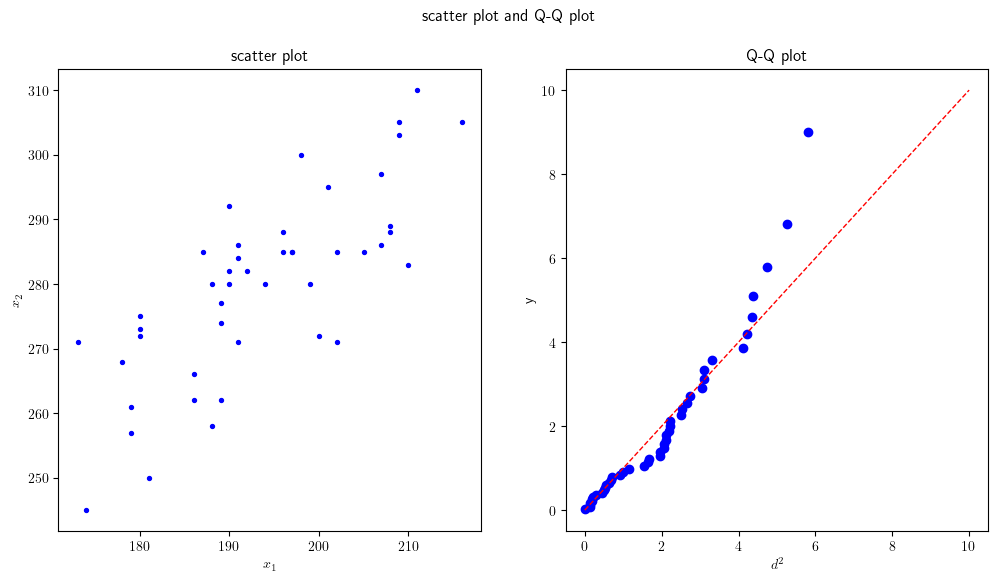

In [6]:
def get_d2_y(df):
    d2 = np.zeros(df.shape[0])
    for i in range(df.shape[0]):
        d2[i] = np.dot(np.dot(df.iloc[i, :].values - df.mean(axis=0).values, np.linalg.inv(df.cov())), df.iloc[i, :].values - df.mean(axis=0).values)
    d2_sort = np.sort(d2)
    y = np.zeros(df.shape[0])
    for j in range(df.shape[0]):
        y[j] = chi2.ppf((j + 1 / 2) / (df.shape[0]), p)
    return d2_sort, y
d2_sort, y = get_d2_y(df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("scatter plot and Q-Q plot")
ax1.scatter(df[0], df[1], color="blue", s=8)
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_title('scatter plot')
ax2.scatter(d2_sort, y, color="blue")
ax2.set_xlabel(r'$d^2$')
ax2.set_ylabel('y')
ax2.add_line(plt.Line2D([0, 10], [0, 10], color='red', linewidth=1, linestyle='--'))
ax2.set_title('Q-Q plot')
plt.savefig("./hw8/5.20c.pdf")

## 6.1

eigenvalues:[168.12231328 449.75041399]
eigenvectors:
[[-0.94310987 -0.33248123]
 [ 0.33248123 -0.94310987]]
f_value:4.256494729093748


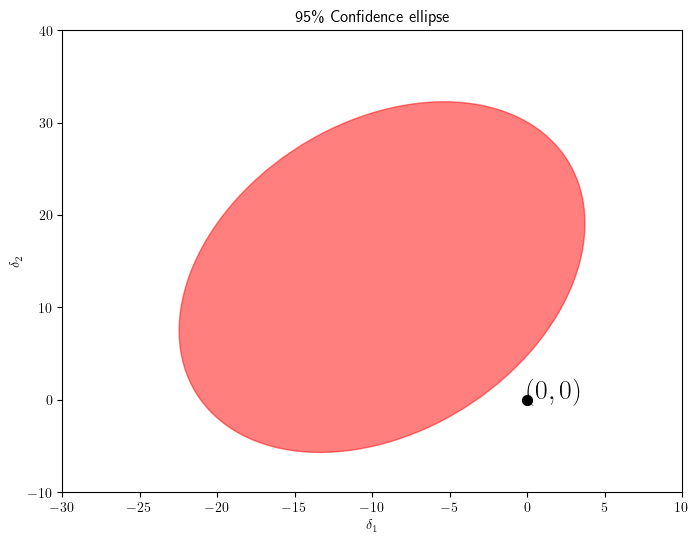

In [7]:
df = pd.read_csv("./hw8/T6-1.dat", header=None, sep="\s+")
d1 = df[0] - df[2]
d2 = df[1] - df[3]
df = pd.DataFrame([d1, d2]).T
eig = get_eig(df)
print(f"eigenvalues:{eig[0]}")
print(f"eigenvectors:\n{eig[1]}")
p = 2
n = df.shape[0]
f_value = get_f(p, n, 0.95)
print(f"f_value:{f_value}")
height, width = get_height_width(p, n, f_value, eig)
ell = get_ell(df, width, height, eig)
ell.set_facecolor('red')
ell.set_edgecolor('red')
ell.set_alpha(0.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_patch(ell)
ax.set_xlim(-30, 10)
ax.set_ylim(-10, 40)
ax.scatter(0, 0, s=50, color="black")
ax.text(0+0.02, 0+0.1, r"$(0,0)$", color="black", fontsize=20)
ax.set_xlabel(r'$\delta_1$')
ax.set_ylabel(r'$\delta_2$')
ax.set_title('95\% Confidence ellipse')
plt.savefig("./hw8/6.1.pdf")

## 6.2

In [8]:
x1_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[0, 0] / n)
x2_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[1, 1] / n)
print(f"x1, Bonferroni:{(df.mean(axis=0)[0] - x1_b, df.mean(axis=0)[0] + x1_b)}")
print(f"x2, Bonferroni:{(df.mean(axis=0)[1] - x2_b, df.mean(axis=0)[1] + x2_b)}")

x1, Bonferroni:(-20.573107267504312, 1.8458345402315874)
x2, Bonferroni:(-2.974903413446885, 29.52035795890143)


## 6.3

In [9]:
df = pd.read_csv("./hw8/T6-1.dat", header=None, sep="\s+")
d1 = df[0] - df[2]
d2 = df[1] - df[3]
df = pd.DataFrame([d1, d2]).T
df = df.drop(7, axis=0)
n = df.shape[0]
f_value = get_f(p, n, 0.95)
x1_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[0, 0])
x2_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[1, 1])
print(f"x1, t_2:{(df.mean(axis=0)[0] - x1_c, df.mean(axis=0)[0] + x1_c)}")
print(f"x2, t_2:{(df.mean(axis=0)[1] - x2_c, df.mean(axis=0)[1] + x2_c)}")
x1_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[0, 0] / n)
x2_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[1, 1] / n)
print(f"x1, Bonferroni:{(df.mean(axis=0)[0] - x1_b, df.mean(axis=0)[0] + x1_b)}")
print(f"x2, Bonferroni:{(df.mean(axis=0)[1] - x2_b, df.mean(axis=0)[1] + x2_b)}")

x1, t_2:(-23.700016337638274, -0.29998366236172735)
x2, t_2:(-5.503710735004049, 22.703710735004048)
x1, Bonferroni:(-21.9179970102631, -2.0820029897369015)
x2, Bonferroni:(-3.355586801481474, 20.555586801481475)


In [10]:
t2 = n * (df.mean(axis=0).T @ np.linalg.inv(df.cov().values) @ df.mean(axis=0))
print(t2)

11.446521827833669


In [11]:
f.ppf(0.95, n, n-p)

3.347163120233978

In [12]:
p * (n - 1) / (n - p) * f_value

10.032682741930149

## 6.4

f_value:4.256494729093748


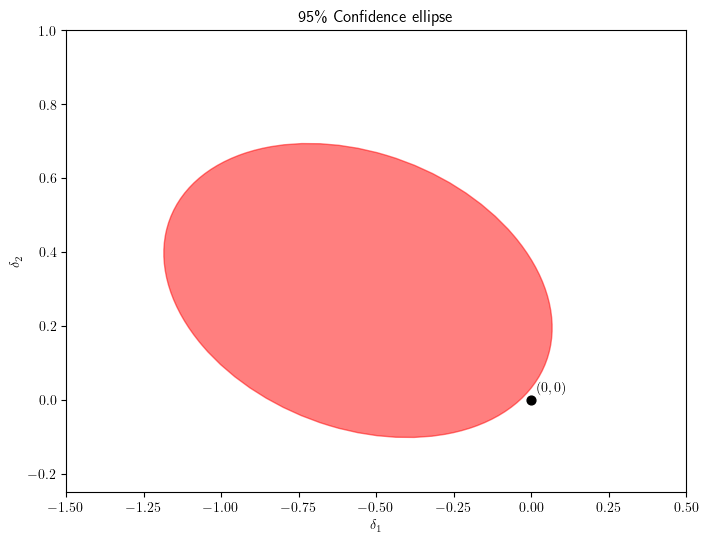

In [13]:
df = pd.read_csv("./hw8/T6-1.dat", header=None, sep="\s+")
d1 = np.log(df[0]) - np.log(df[2])
d2 = np.log(df[1]) - np.log(df[3])

df = pd.DataFrame([d1, d2]).T
eig = get_eig(df)

p = 2
n = df.shape[0]
f_value = get_f(p, n, 0.95)
print(f"f_value:{f_value}")
height, width = get_height_width(p, n, f_value, eig)
ell = get_ell(df, width, height, eig)
ell.set_facecolor('red')
ell.set_edgecolor('red')
ell.set_alpha(0.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_patch(ell)
ax.set_xlim(-1.5, 0.5)
ax.set_ylim(-0.25, 1)
ax.scatter(0, 0, s=40, color="black")
ax.text(0+0.02, 0+0.02, r"$(0,0)$", color="black", fontsize=10)
ax.set_xlabel(r'$\delta_1$')
ax.set_ylabel(r'$\delta_2$')
ax.set_title('95\% Confidence ellipse')
plt.savefig("./hw8/6.4a.pdf")

In [14]:
x1_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[0, 0])
x2_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[1, 1])
print(f"x1, t_2:{(df.mean(axis=0)[0] - x1_c, df.mean(axis=0)[0] + x1_c)}")
print(f"x2, t_2:{(df.mean(axis=0)[1] - x2_c, df.mean(axis=0)[1] + x2_c)}")
x1_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[0, 0] / n)
x2_b = t.ppf(1-0.05/4, n-1) * np.sqrt(df.cov().values[1, 1] / n)
print(f"x1, Bonferroni:{(df.mean(axis=0)[0] - x1_b, df.mean(axis=0)[0] + x1_b)}")
print(f"x2, Bonferroni:{(df.mean(axis=0)[1] - x2_b, df.mean(axis=0)[1] + x2_b)}")

x1, t_2:(-1.1844403687587428, 0.0680501029019922)
x2, t_2:(-0.10209878133027284, 0.6931553557103345)
x1, Bonferroni:(-1.0944879494923838, -0.02190231636436668)
x2, Bonferroni:(-0.04498454758801401, 0.6360411219680757)


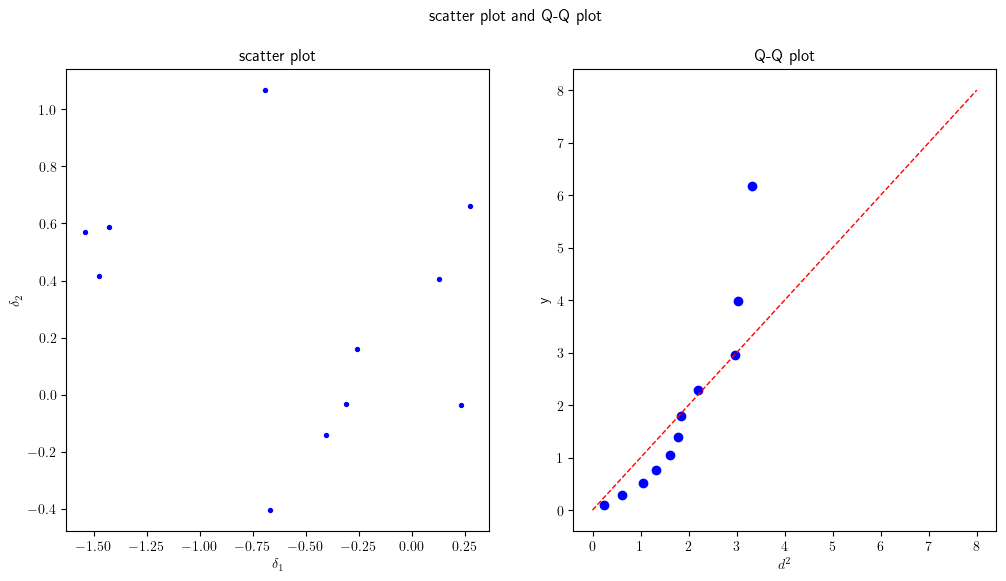

In [15]:
d2_sort, y = get_d2_y(df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("scatter plot and Q-Q plot")
ax1.scatter(df[0], df[1], color="blue", s=8)
ax1.set_xlabel(r'$\delta_1$')
ax1.set_ylabel(r'$\delta_2$')
ax1.set_title('scatter plot')
ax2.scatter(d2_sort, y, color="blue")
ax2.set_xlabel(r'$d^2$')
ax2.set_ylabel('y')
ax2.add_line(plt.Line2D([0, 8], [0, 8], color='red', linewidth=1, linestyle='--'))
ax2.set_title('Q-Q plot')
plt.savefig("./hw8/6.4c.pdf")